# Welcome to my Richter's Predictor Nepal Earthquake Damage Predictor Tensor Flow Decision Forest (TFDF) Model!

Default code from Kaggle Notebook:

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



## Displaying some important libraries:

In [36]:
# import tensorflow as tf
# print("Tensorflow:", tf.__version__)

# import kerastuner as kt
# print("kerastuner:", kt.__version__)

# import keras_tuner as kt2
# print("keras_tuner:", kt2.__version__)

# import platform
# print("Python:", platform.python_version())

# import numpy as np
# print("numpy:", np.__version__)

# import pandas as pd
# print("pandas:", pd.__version__)

# import sklearn
# print("sklearn version:", sklearn.__version__)

# import sklearn
# print("sklearn path:", sklearn.__path__)

# import matplotlib
# print("matplotlib:", matplotlib.__version__)

# import seaborn as sns
# print("seaborn:", sns.__version__)

# # WARNING:tensorflow:From c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

# # Tensorflow: 2.15.0
# # C:\Users\Micha\AppData\Local\Temp\ipykernel_6936\1753711907.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
# #   import kerastuner as kt
# # kerastuner: 1.0.5
# # keras_tuner: 1.3.5
# # Python: 3.10.11
# # numpy: 1.24.3
# # pandas: 2.1.4
# # sklearn version: 1.2.2
# # sklearn path: ['c:\\Users\\Micha\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\sklearn']
# # matplotlib: 3.8.2
# # seaborn: 0.13.0


## Set Global random seed to make sure we can replicate any model that we create (no randomness)

In [37]:
import random
import tensorflow as tf
import numpy as np
import os



np.random.seed(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

### Loading the training and testing data

train_values are the features (X), and train_labels is the target/label (Y)

In [38]:
# train_X = pd.read_csv("train_values.csv")
# train_Y = pd.read_csv("train_labels.csv")


n_train = int(len(pd.read_csv("train_values.csv")) * 0.01)
train_X = pd.read_csv("train_values.csv").head(n_train)
train_Y = pd.read_csv("train_labels.csv").head(n_train)

test_values = pd.read_csv("test_values.csv")

# print("train labels:\n", train_Y.head())

# print("train values:\n", train_X.head())
      
# print("test_values:\n", test_values.head())

## I want to find out which features to use since there are so many. Here are some common data science techniques:

1. **Correlation Matrix with Heatmap**: Correlation states how the features are related to each other or the target variable. You can use a heatmap to visualize the correlation matrix.

2. **Univariate Selection**: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the `SelectKBest` class that can be used with a suite of different statistical tests to select a specific number of features.

3. **Recursive Feature Elimination (RFE)**: RFE is a popular feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

4. **Feature Importance**: You can get the feature importance of each feature of your dataset by using the feature importance property of the model. For example, Decision Trees models in the scikit-learn library offer an importance property that can be accessed directly.

For categorical features, you can convert them into numerical values using techniques like One-Hot Encoding or Label Encoding before applying these feature selection techniques. 

## First, I will try RFE (Recursive Feature Elimination)

In [39]:
# from sklearn.feature_selection import RFE
# from lightgbm import LGBMRegressor #Lightgbm is a great gradient boosting model for large amount of data

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy

# estimator = LGBMRegressor(verbose = 0, random_state = 42)  # It's best to find the best model for you
# selector = RFE(estimator, step=1)
# selector = selector.fit(X, y)

# # Assuming 'X' is your DataFrame with the feature data
# feature_names = X.columns

# # Map the feature names to the support array, which tells you which features were selected
# support_dict = dict(zip(feature_names, selector.support_))

# # Get the selected features
# selected_features = [feature for feature, support in support_dict.items() if support]

# # Print the selected features
# print("Selected features:\n", selected_features)

# # ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
# # 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
# # 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
# # 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
# # 'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
# # 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
# # 'plan_configuration_u']







# # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# # Selected features are assigned rank 1.
# # Map the feature names to the ranking array
# ranking_dict = dict(zip(feature_names, selector.ranking_))
# print(ranking_dict)


# # [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2 18 10 31
# #  27 33 28 25 30  6  1  1  3  1  8  1  1  5  1  1  1  1 34  1  1 16  9  1
# #  23  7  4 14  1 29 15 20 17 35 32 24 21 13 26  1 11 22 12 19]


# # {'geo_level_1_id': 1, 'geo_level_2_id': 1, 'geo_level_3_id': 1, 'count_floors_pre_eq': 1, 'age': 1, 'area_percentage': 1, 
# #  'height_percentage': 1, 'has_superstructure_adobe_mud': 1, 'has_superstructure_mud_mortar_stone': 1, 'has_superstructure_stone_flag': 1, 
# #  'has_superstructure_cement_mortar_stone': 1, 'has_superstructure_mud_mortar_brick': 1, 'has_superstructure_cement_mortar_brick': 1, 
# #  'has_superstructure_timber': 1, 'has_superstructure_bamboo': 1, 'has_superstructure_rc_non_engineered': 1, 'has_superstructure_rc_engineered': 1, 
# #  'has_superstructure_other': 1, 'count_families': 1, 'has_secondary_use': 1, 'has_secondary_use_agriculture': 2, 'has_secondary_use_hotel': 18, 
# #  'has_secondary_use_rental': 10, 'has_secondary_use_institution': 31, 'has_secondary_use_school': 27, 'has_secondary_use_industry': 33, 
# #  'has_secondary_use_health_post': 28, 'has_secondary_use_gov_office': 25, 'has_secondary_use_use_police': 30, 'has_secondary_use_other': 6, 
# #  'land_surface_condition_n': 1, 'land_surface_condition_o': 1, 'land_surface_condition_t': 3, 'foundation_type_h': 1, 'foundation_type_i': 8, 
# #  'foundation_type_r': 1, 'foundation_type_u': 1, 'foundation_type_w': 5, 'roof_type_n': 1, 'roof_type_q': 1, 'roof_type_x': 1, 
# #  'ground_floor_type_f': 1, 'ground_floor_type_m': 34, 'ground_floor_type_v': 1, 'ground_floor_type_x': 1, 'ground_floor_type_z': 16, 
# #  'other_floor_type_j': 9, 'other_floor_type_q': 1, 'other_floor_type_s': 23, 'other_floor_type_x': 7, 'position_j': 4, 'position_o': 14, 
# #  'position_s': 1, 'position_t': 29, 'plan_configuration_a': 15, 'plan_configuration_c': 20, 'plan_configuration_d': 17, 'plan_configuration_f': 35, 
# #  'plan_configuration_m': 32, 'plan_configuration_n': 24, 'plan_configuration_o': 21, 'plan_configuration_q': 13, 'plan_configuration_s': 26, 
# #  'plan_configuration_u': 1, 'legal_ownership_status_a': 11, 'legal_ownership_status_r': 22, 'legal_ownership_status_v': 12, 
# #  'legal_ownership_status_w': 19}

In [40]:
features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
'plan_configuration_u']

print(len(features))


# Find out which features are created through one-hot-encoding
import pandas as pd

# Load the original data
original_data = pd.read_csv('train_values.csv')

# Get the original feature names
original_features = original_data.columns

# Check which features are not in the original data
new_features = [feature for feature in features if feature not in original_features]

# Print the new features
print("New features:\n", new_features)


#Manually remove the one-hot-encoding that pd.get_dummies() used on categorial 
features_before_dummies = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type','other_floor_type', 'position','plan_configuration']

print(len(features_before_dummies))

34
New features:
 ['land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s', 'plan_configuration_u']
27


## Data Analysis from ChatGPT-4 (second way to find best features):

The categorical variables in the features dataset have been successfully encoded. Now, let's look at the correlation of these features with the `damage_grade`:

#### Correlation with `damage_grade`
The correlation values range between -1 and 1. A value closer to 1 indicates a strong positive correlation, meaning that as the feature increases, the `damage_grade` tends to increase. Conversely, a value closer to -1 indicates a strong negative correlation, where an increase in the feature leads to a decrease in `damage_grade`. Values around 0 imply weak or no linear correlation.

#### Top Positively Correlated Features:
- `has_superstructure_mud_mortar_stone`
- `count_floors_pre_eq`
- Other features like `legal_ownership_status`, `has_superstructure_stone_flag`, etc., also show positive correlation but to a lesser extent.

#### Top Negatively Correlated Features:
- `has_superstructure_cement_mortar_brick`
- `ground_floor_type`
- `has_superstructure_rc_engineered`
- Other features like `roof_type`, `has_superstructure_rc_non_engineered`, etc., also show negative correlation.


Here are the selected features based on the correlation threshold (of 0.05):

1. `has_superstructure_mud_mortar_stone`
2. `count_floors_pre_eq`
3. `legal_ownership_status`
4. `has_superstructure_stone_flag`
5. `count_families`
6. `has_superstructure_adobe_mud`
7. `position`
8. `has_superstructure_cement_mortar_stone`
9. `has_superstructure_bamboo`
10. `has_superstructure_timber`
11. `geo_level_1_id`
12. `has_secondary_use`
13. `has_secondary_use_rental`
14. `has_secondary_use_hotel`
15. `foundation_type`
16. `area_percentage`
17. `has_superstructure_rc_non_engineered`
18. `roof_type`
19. `has_superstructure_rc_engineered`
20. `ground_floor_type`
21. `has_superstructure_cement_mortar_brick`

These features were chosen because they have a correlation with the target variable `damage_grade` greater than the specified threshold of 0.05 (in absolute value). You can use these features for building your predictive model. 


In [41]:
features2 = [
    "has_superstructure_mud_mortar_stone",
    "count_floors_pre_eq",
    "legal_ownership_status",
    "has_superstructure_stone_flag",
    "count_families",
    "has_superstructure_adobe_mud",
    "position",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_bamboo",
    "has_superstructure_timber",
    "geo_level_1_id",
    "has_secondary_use",
    "has_secondary_use_rental",
    "has_secondary_use_hotel",
    "foundation_type",
    "area_percentage",
    "has_superstructure_rc_non_engineered",
    "roof_type",
    "has_superstructure_rc_engineered",
    "ground_floor_type",
    "has_superstructure_cement_mortar_brick"
]

### Third, I will try SelectKBest to find best features

In [42]:
# from sklearn.feature_selection import SelectKBest, f_classif


# # Create the SelectKBest with the f_classif function. You can set the parameter "k" equal to a number if you want to limit the amount of features
# selector = SelectKBest(f_classif, k = 20) # Getting the 20 best features

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy


# # Fit the selector to the data
# selector.fit(X, y)

# # Get the boolean mask of the selected features
# mask = selector.get_support()

# # Get the names of the selected features
# selected_features = X.columns[mask]

# # Convert the Index object to a list
# features3 = selected_features.tolist()

# print(features3)

# # ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
# #  'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
# #  'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
# #  'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']


# # Get the scores
# scores = selector.scores_

# # Create a DataFrame with the scores
# features_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# # Sort the DataFrame by score in descending order
# features_scores = features_scores.sort_values(by='Score', ascending=False)

# # print the best 20 features
# print(features_scores[0:19])

# #                                    Feature         Score
# # 35                       foundation_type_r  23787.275036
# # 43                     ground_floor_type_v  20782.933584
# # 40                             roof_type_x  16891.038184
# # 8      has_superstructure_mud_mortar_stone  16490.386507
# # 34                       foundation_type_i  16385.772905
# # 12  has_superstructure_cement_mortar_brick  11120.193268
# # 48                      other_floor_type_s  10507.484572
# # 41                     ground_floor_type_f  10151.525359
# # 16        has_superstructure_rc_engineered   7757.593854
# # 47                      other_floor_type_q   7378.599061
# # 15    has_superstructure_rc_non_engineered   4721.916051
# # 37                       foundation_type_w   4568.674306
# # 46                      other_floor_type_j   4533.708398
# # 36                       foundation_type_u   2972.409108
# # 0                           geo_level_1_id   2657.791274
# # 3                      count_floors_pre_eq   2544.836052
# # 5                          area_percentage   2529.046730
# # 38                             roof_type_n   1776.396178
# # 21                 has_secondary_use_hotel   1537.672773

# # ...

# # 22                has_secondary_use_rental   1342.099336
# # 64                legal_ownership_status_a   1166.606551
# # 19                       has_secondary_use    841.802928
# # 39                             roof_type_q    761.885856
# # 7             has_superstructure_adobe_mud    739.412821
# # 13               has_superstructure_timber    659.199014
# # 9            has_superstructure_stone_flag    576.438023
# # 14               has_superstructure_bamboo    538.551492
# # 66                legal_ownership_status_v    536.308634
# # 11     has_superstructure_mud_mortar_brick    531.784659
# # 63                    plan_configuration_u    515.087147
# # 10  has_superstructure_cement_mortar_stone    478.844199
# # 18                          count_families    476.562914
# # 56                    plan_configuration_d    378.234531
# # 53                              position_t    373.594539
# # 6                        height_percentage    370.173817
# # 20           has_secondary_use_agriculture    289.462856
# # 1                           geo_level_2_id    264.447807
# # 49                      other_floor_type_x    244.432657
# # 4                                      age    219.626253
# # 33                       foundation_type_h    209.425818
# # 32                land_surface_condition_t    201.698101
# # 30                land_surface_condition_n    182.152148
# # 61                    plan_configuration_q    165.370472
# # 23           has_secondary_use_institution    146.731486
# # 17                has_superstructure_other    142.014204
# # 50                              position_j    136.783490
# # 67                legal_ownership_status_w    116.039402
# # 52                              position_s    110.038831
# # 55                    plan_configuration_c     75.423022
# # 51                              position_o     75.104323


In [43]:
features3 = ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
 'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
 'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']

### Check to see if there are any missing values in the data. If so, we have to do imputation

In [44]:
missing_train_X = train_X.isnull().sum().sum()
print("Number of missing values in train_X:", missing_train_X)

missing_train_Y = train_Y.isnull().sum().sum()
print("Number of missing values in train_Y:", missing_train_Y)

missing_test_values = test_values.isnull().sum().sum()
print("Number of missing values in test_values:", missing_test_values )

Number of missing values in train_X: 0
Number of missing values in train_Y: 0
Number of missing values in test_values: 0


Since we have 0 missing values in each dataframe, we don't have to do imputation!

### Now, we have 3 different list of features (features, features2, and features3), which I found using RFE. Data Analysis ChatGPT-4, and SelectKBest respectively

#### Now, I have to turn one-hot-encode the data using pd.get_dummies, and I'll be creating 3 seperate train_X, one for each list of possible best features. And also on the test_data

In [45]:
# 1. testX1 for the RFE features
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX1 = pd.get_dummies(train_X)
trainX1 = trainX1[features]


# 2. testX2 for the Data Analysis ChatGPT-4
# Since the features from Data Analysis are from the original feature set, we have to apply the features before doing pd.get_dummies()

trainX2 = train_X[features2]
trainX2 = pd.get_dummies(trainX2)



# 3. testX3 for the SelectKBest
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX3 = pd.get_dummies(train_X)
trainX3 = trainX3[features3]



# 4. Do pd.get_dummies() on test data. I will create a seperate test_data for each feature selection, since each test_data needs to have a certain set of features

test_data1 = pd.get_dummies(test_values)
test_data1 = test_data1[features + ['building_id'] ]

test_data2 = test_values[features2 + ['building_id'] ]
test_data2 = pd.get_dummies(test_data2)

test_data3 = pd.get_dummies(test_values)
test_data3 = test_data3[features3 + ['building_id'] ]



### It's important to do pd.get_dummies() before doing the train_valid_test split. Now we can do the split
I have to do train_valid_test split three times, one for each different train_X

In [46]:
from sklearn.model_selection import train_test_split

# 1. train_valid_test split for train_X1
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(trainX1, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X1, test_X1, valid_Y1, test_Y1 = train_test_split(test_X1, test_Y1, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 2. train_valid_test split for train_X2
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(trainX2, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X2, test_X2, valid_Y2, test_Y2 = train_test_split(test_X2, test_Y2, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 3. train_valid_test split for train_X3
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(trainX3, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X3, test_X3, valid_Y3, test_Y3 = train_test_split(test_X3, test_Y3, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)

### Now, we can normalize the data

**Creating the Normalizing Scaler**

There are many different Normalization Scalers:

1. **MinMaxScaler**: This scaler scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.


2. **StandardScaler**: This scaler standardizes features by removing the mean and scaling to unit variance.


3. **RobustScaler**: This scaler scales features using statistics that are robust to outliers. It uses the Interquartile Range (IQR) to scale the data, making it a better choice for when the data has outliers.


4. **Normalizer**: This scaler scales individual samples to have unit norm. This scaler works on the rows, not the columns!


5. **MaxAbsScaler**: This scaler scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


Remember, the choice of scaler can depend on your specific dataset and the machine learning algorithm that you're using.

In [47]:
# I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

### Change all the data to float32 so that it can be converted into tensor

In [48]:
train_X1 = train_X1.astype('float32')
valid_X1 = valid_X1.astype('float32')
test_X1 = test_X1.astype('float32')

train_Y1 = train_Y1.astype('float32')
valid_Y1 = valid_Y1.astype('float32')
test_Y1 = test_Y1.astype('float32')

train_X2 = train_X2.astype('float32')
valid_X2 = valid_X2.astype('float32')
test_X2 = test_X2.astype('float32')

train_Y2 = train_Y2.astype('float32')
valid_Y2 = valid_Y2.astype('float32')
test_Y2 = test_Y2.astype('float32')

train_X3 = train_X3.astype('float32')
valid_X3 = valid_X3.astype('float32')
test_X3 = test_X3.astype('float32')

train_Y3 = train_Y3.astype('float32')
valid_Y3 = valid_Y3.astype('float32')
test_Y3 = test_Y3.astype('float32')

test_data1 = test_data1.astype('float32')
test_data2 = test_data2.astype('float32')
test_data3 = test_data3.astype('float32')


### Model 1 for TFDF

I'll be using automatic hyper parameter space since I don't know what the good hyperparameters are

The dataset might be too big for TFDF. In that case, try and cut data in half or something

In [50]:

import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow_decision_forests as tfdf
from tensorflow.keras.models import load_model


# %pip install wurlitzer -U -qq # This will automatically install wurlitzer when you run this notebook



if os.path.isdir("_model1_RF"): # If the model already exists (inside a directory named model3_RF)
    model1 = load_model("model1_RF") # set model3 equal to this already existing model


else: # if the model1 doesn't exist already, create it
    train_Y1_temp = train_Y1['damage_grade'] - 1  
    valid_Y1_temp = valid_Y1['damage_grade'] - 1
    test_Y1_temp = test_Y1['damage_grade'] - 1


    train_RF_X = pd.concat([train_X1, valid_X1, test_X1], ignore_index=True)  
    train_RF_Y = pd.concat([train_Y1_temp, valid_Y1_temp , test_Y1_temp], ignore_index=True)
    train_RF = pd.concat([train_RF_X, train_RF_Y], axis = 1, ignore_index = False)

    # test_RF_X = test_X
    # test_RF_Y = test_Y
    # test_RF = pd.concat([test_RF_X, test_RF_Y], axis = 1, ignore_index = False)

    train_data_RF = tfdf.keras.pd_dataframe_to_tf_dataset(train_RF, label = "damage_grade", task = tfdf.keras.Task.CLASSIFICATION)

    # test_data_RF = tfdf.keras.pd_dataframe_to_tf_dataset(test_RF, label = "Survived")


    #This is a TensorFlow Decision Forest Tuner. I am using RandomSearch since it might be the only one, and also because I want it to be fast
    tuner1 = tfdf.tuner.RandomSearch(num_trials=1, use_predefined_hps=True, trial_num_threads = 8) 


    #Now I make the model and do .fit() on it since .fit() will cause the tuner to run and find the best hyperparameters
    # MAKE SURE TO SET THE "tuner" PARAMETER IN ORDER FOR THE TUNER TO RUN
    model1 = tfdf.keras.RandomForestModel(tuner = tuner1, compute_oob_performances = True, compute_oob_variable_importances = True, random_seed = 42, verbose = 1, task = tfdf.keras.Task.CLASSIFICATION)

    model1.compile(["accuracy"])

    model1.fit(train_data_RF, verbose = 1)

    print("h1")

    model1.save("model1_RF")

    print("h")

    # Display the tuning logs
    tuning_logs = model1.make_inspector().tuning_logs()
    tuning_logs.head()


    # Make sure to either save the model or save all the hyper parameters of the model since we used RandomSearch() 
    # here so if we run the code again, we will get a totally different model!

    # Best hyper-parameters
    print(tuning_logs[tuning_logs.best].iloc[0])



    # these lines below will save the best hyperparameters to a JSON file that will be stored in a file, so that I can always look back at it incase I want to replicate this model and it's results
    import json

    best_hyperparameters = tuning_logs[tuning_logs.best].iloc[0].to_dict() # convert to a dictionary so that you can convert it to a JSON

    # Save the best hyperparameters to a file
    with open('hyperparameters_TFDF_model1.json', 'w') as f:
        json.dump(best_hyperparameters, f)


        

    # these lines basically saves the ".summary()" method into a file so that I can use it later if I want to replicate this model
    import sys

    with open('model1_RF_summary.txt', 'w') as f: 
        old_stdout = sys.stdout  # Save the original standard output
        sys.stdout = f  # Redirect standard output to the file

        model1.summary()  # This will be written to the file. Basically, by changing the standard output, this will print the summary in my file INSTEAD of inside the jupyter notebook. The standard output dictates where the print outputs go

        sys.stdout = old_stdout  # Restore the original standard output

# It took 50 seconds to do one trial with 1/100 of the original training data


# Note: you may need to restart the kernel to use updated packages.
# Use /tmp/tmp7wvzg4q6 as temporary training directory
# Reading training dataset...
# Training dataset read in 0:00:02.396684. Found 712 examples.
# Training model...
# Model trained in 0:01:54.848762
# Compiling model...


Use /tmp/tmpb7cyid92 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.231733. Found 2606 examples.
Training model...
Model trained in 0:00:40.034452
Compiling model...


[INFO 24-01-11 22:06:54.4419 EST kernel.cc:1233] Loading model from path /tmp/tmpb7cyid92/model/ with prefix 8ea0622780a54347
[INFO 24-01-11 22:06:54.5288 EST decision_forest.cc:660] Model loaded with 300 root(s), 28818 node(s), and 34 input feature(s).
[INFO 24-01-11 22:06:54.5288 EST abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-01-11 22:06:54.5288 EST kernel.cc:1061] Use fast generic engine


Model compiled.
h1
INFO:tensorflow:Assets written to: model1_RF/assets


INFO:tensorflow:Assets written to: model1_RF/assets


h
score                                             0.673062
evaluation_time                                  39.882017
best                                                  True
split_axis                                  SPARSE_OBLIQUE
sparse_oblique_projection_density_factor               5.0
sparse_oblique_normalization                       MIN_MAX
sparse_oblique_weights                              BINARY
categorical_algorithm                                 CART
winner_take_all                                       true
max_depth                                               12
min_examples                                            40
Name: 0, dtype: object


### This is a cool way to see the best trial performance in a graph

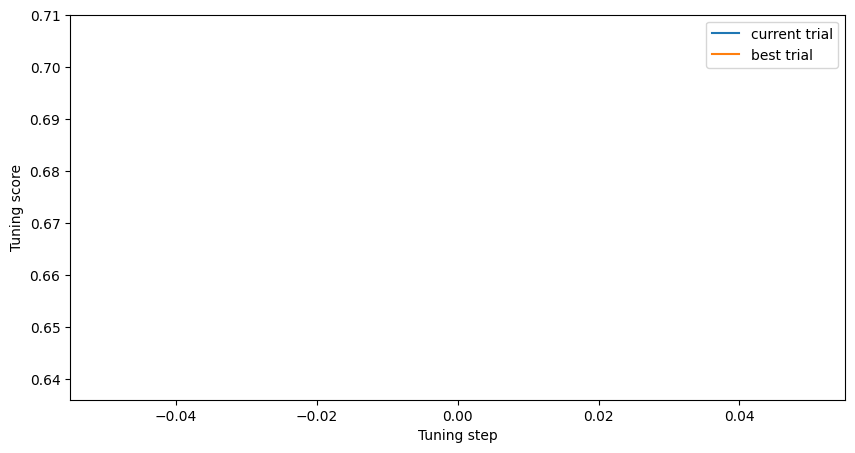

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()


## Submitting Model 1. Score: 65.47

In [52]:
from tensorflow.keras.models import load_model

model1 = load_model("model1_RF")


# Separate building_ids and features in the test data
competition_test_building_ids = test_data1['building_id']
competition_test_X = test_data1.drop('building_id', axis=1)


#  Convert the test data to a tf dataset
test_data_RF = tfdf.keras.pd_dataframe_to_tf_dataset(competition_test_X, task=tfdf.keras.Task.CLASSIFICATION)

# Generate predictions
predictions = model1.predict(test_data_RF)

# Get the class with the highest probability for each instance
predictions = predictions.argmax(axis=-1)

# Since the competition expects labels in the range 1-3, add 1 to the predictions
predictions = predictions + 1

# Create a DataFrame for submission
submission = pd.DataFrame({
    'building_id': competition_test_building_ids,
    'damage_grade': predictions
})


# Save the DataFrame to a CSV file
submission.to_csv('submission_TFDF_1.csv', index=False)
print("Your submission was successfully saved!")

[INFO 24-01-11 22:06:55.3617 EST kernel.cc:1233] Loading model from path model1_RF/assets/ with prefix 8ea0622780a54347


 1/87 [..............................] - ETA: 8s

[INFO 24-01-11 22:07:03.2526 EST decision_forest.cc:660] Model loaded with 300 root(s), 28818 node(s), and 34 input feature(s).
[INFO 24-01-11 22:07:03.2527 EST kernel.cc:1061] Use fast generic engine


87/87 [==============================] - 3s 38ms/step
Your submission was successfully saved!
